### Importación de datos



In [32]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


Lo primero que se me ocurre es agregar una columna que exprese la 'Facturación Neta' (suponiendo que el Costo de envío lo paga la Empresa).
Luego agrego otra columna que nos da el 'nombre de la Tienda'. Esto con la intención de no perder el rastro de a que tienda pertenecen los datos, cuando 'junte los 4 Dataframes en uno solo'.

In [33]:
tienda2["Facturacion_Neta"] = tienda2["Precio"] - tienda2["Costo de envío"]
tienda3["Facturacion_Neta"] = tienda3["Precio"] - tienda3["Costo de envío"]
tienda4["Facturacion_Neta"] = tienda4["Precio"] - tienda4["Costo de envío"]
tienda["Facturacion_Neta"] = tienda["Precio"] - tienda["Costo de envío"]
tienda["Nbre_Sucursal"] = "Tienda1"
tienda2["Nbre_Sucursal"] = "Tienda2"
tienda3["Nbre_Sucursal"] = "Tienda3"
tienda4["Nbre_Sucursal"] = "Tienda4"

In [34]:
tienda2.dtypes

,0
Producto,object
Categoría del Producto,object
Precio,float64
Costo de envío,float64
Fecha de Compra,object
Vendedor,object
Lugar de Compra,object
Calificación,int64
Método de pago,object
Cantidad de cuotas,int64


#1. Análisis de facturación



En el prox código filtro 'que columnas me interesan para trabajar'.
Luego 'concateno los Dataframes' (solo con las columnas necesarias)

In [35]:
columnas_a_usar = ["Nbre_Sucursal", "Producto", "Categoría del Producto", "Precio", "Costo de envío", "Facturacion_Neta", "Calificación"]
tienda1_filtr = tienda[columnas_a_usar]
tienda2_filtr = tienda2[columnas_a_usar]
tienda3_filtr = tienda3[columnas_a_usar]
tienda4_filtr = tienda4[columnas_a_usar]
todas_las_tiendas = pd.concat([tienda1_filtr, tienda2_filtr, tienda3_filtr, tienda4_filtr], ignore_index=True)
todas_las_tiendas.head()

,Nbre_Sucursal,Producto,Categoría del Producto,Precio,Costo de envío,Facturacion_Neta,Calificación
0,Tienda1,Asistente virtual,Electrónicos,164300.0,6900.0,157400.0,4
1,Tienda1,Mesa de comedor,Muebles,192300.0,8400.0,183900.0,1
2,Tienda1,Juego de mesa,Juguetes,209600.0,15900.0,193700.0,1
3,Tienda1,Microondas,Electrodomésticos,757500.0,41000.0,716500.0,4
4,Tienda1,Silla de oficina,Muebles,335200.0,20200.0,315000.0,5


In [36]:
vtas_por_tienda = todas_las_tiendas.groupby("Nbre_Sucursal")["Facturacion_Neta"].sum().sort_values(ascending=True).apply(lambda x: f"${x:,.2f}").reset_index()
vtas_por_tienda

,Nbre_Sucursal,Facturacion_Neta
0,Tienda4,"$983,058,300.00"
1,Tienda3,"$1,039,503,000.00"
2,Tienda2,"$1,056,858,400.00"
3,Tienda1,"$1,089,502,500.00"


Si tengo que hacerlo usando lo aprendido...sería Listas.  A ver:

In [37]:
tot_facturado = []
tiendas = ["Tienda1", "Tienda2", "Tienda3", "Tienda4"]
tot_facturado.append(tienda["Facturacion_Neta"].sum())
tot_facturado.append(tienda2["Facturacion_Neta"].sum())
tot_facturado.append(tienda3["Facturacion_Neta"].sum())
tot_facturado.append(tienda4["Facturacion_Neta"].sum())
mayor_facturac = max(tot_facturado)
menor_facturac = min(tot_facturado)
indice_menor = tot_facturado.index(menor_facturac)
print("La tienda:", tiendas[indice_menor]," tiene la menor Facturacion:",menor_facturac)

La tienda: Tienda4  tiene la menor Facturacion: 983058300.0


# 2. Ventas por categoría

# Esta Instruccion agrupa el DataFrame por "Sucursal" y "Categoría".
Se utiliza 'agg' (de agregado) porque agrupamos la 'suma' de la columna 'Facturacion_Neta' (por sucursal y categia obvio), y además la 'cantidad' de la columna 'Producto' (que es string, es decir cuenta cuantos Productos se vendieron por Sucursal y por Categoria)

In [38]:
vtas_por_categ = todas_las_tiendas.groupby(["Nbre_Sucursal", "Categoría del Producto"]).agg({
    "Facturacion_Neta": "sum",
    "Producto": "count"
}).sort_values(by=["Nbre_Sucursal", "Facturacion_Neta"], ascending=[True,True]).reset_index()
vtas_por_categ.sort_values(by="Categoría del Producto").head(60)

,Nbre_Sucursal,Categoría del Producto,Facturacion_Neta,Producto
1,Tienda1,Artículos para el hogar,12054600.0,171
25,Tienda4,Artículos para el hogar,14220400.0,201
9,Tienda2,Artículos para el hogar,13946100.0,181
17,Tienda3,Artículos para el hogar,14247600.0,177
27,Tienda4,Deportes y diversión,31580000.0,277
3,Tienda1,Deportes y diversión,37168900.0,284
19,Tienda3,Deportes y diversión,33670000.0,277
11,Tienda2,Deportes y diversión,32867200.0,275
6,Tienda1,Electrodomésticos,344361200.0,312
22,Tienda3,Electrodomésticos,311743700.0,278


Acá reversiono el código para utilizar Listas y Diccionarios.
Primero creo una Lista de Listas (solo con los campos que necesito) a partir del DF concatenado.
Luego creo un Diccionario con las Categorías (llaves) existentes. Y los valores resultan de la Sumatoria del Total Facturado (en cada registro digamos)

In [50]:
from collections import defaultdict
listiendas = todas_las_tiendas[["Precio","Categoría del Producto"]].values.tolist()
#listiendas = tienda.values.tolist()
#listiendas[1]
fact_por_categoria = defaultdict(int)
# Recorro la Lista que contiene otras listas con lo Facturado y la Categoría
for facturado, categoria in listiendas:
   fact_por_categoria[categoria] += facturado
#categ_mas_vendidas = sorted(resultado, key=lambda x: x[1], reverse=True)
categoria_mas_vendida = max(fact_por_categoria.items(), key=lambda x: x[1])
categoria_menos_vendida = min(fact_por_categoria.items(), key=lambda x: x[1])
#
print("Categoría más vendida:", categoria_mas_vendida)
print("Categoría menos vendida:", categoria_menos_vendida)

Categoría más vendida: ('Electrónicos', 1660576500.0)
Categoría menos vendida: ('Libros', 37696100.0)


# 3. Calificación promedio de la tienda


Teniendo una columna Calificaciòn, que asumo (porque no está explicado) que 5 es la mayor, y 0 es la menor calificación que da el Cliente, "agrupo" todos los registros por Sucursal para obtener 1 solo registo con el Promedio de la Calificacion.  

In [40]:
calif_promedio = todas_las_tiendas.groupby("Nbre_Sucursal")["Calificación"].mean().round(2).reset_index()
calif_promedio

,Nbre_Sucursal,Calificación
0,Tienda1,3.98
1,Tienda2,4.04
2,Tienda3,4.05
3,Tienda4,4.00


# 4. Productos más y menos vendidos

Con toda la data y suponiendo que cada registro es la venta de 1 Producto, "agrupo la info" por Sucursal y por Producto, y como estoy usando el método size() obtengo la "cantidad vendida" de cada Producto diferente en cada Sucursal.
Luego con el método sort_values puedo ordenar el Resultado 'por Sucursal y por Candtidad Vendida'. Me sirve ordenar asi para dar una idea que de productos se venden más y menos en cada Tienda.
El reset_index() sirve para convertir en columna del Dataframe (vtas_por_producto) a la 'Cantidad Vendida'.  
Esto con la intención de poder 'manipular con gráficos' posteriormente a ese DF.


In [41]:
#Vtas_por_producto = todas_las_tiendas.groupby(["Nbre_Sucursal", "Producto"]).size().sort_values(by=["Nbre_Sucursal", "Producto"], ascending=[True,False])
vtas_por_producto = todas_las_tiendas.groupby(["Nbre_Sucursal", "Producto"]).size().reset_index(name="Cantidad_Vendida").sort_values(
    by=["Nbre_Sucursal", "Cantidad_Vendida"], ascending=[True, False])
#vtas_por_producto.sort_values(by="Producto").head(30)
vtas_por_producto

,Nbre_Sucursal,Producto,Cantidad_Vendida
1,Tienda1,Armario,60
33,Tienda1,Microondas,60
48,Tienda1,TV LED UHD 4K,60
40,Tienda1,Secadora de ropa,58
9,Tienda1,Bloques de construcción,56
...,...,...,...
181,Tienda4,Lavadora de ropa,38
192,Tienda4,Refrigerador,38
174,Tienda4,Guitarra acústica,37
154,Tienda4,Armario,34


# 5. Envío promedio por tienda

In [42]:
costo_promedio = todas_las_tiendas.groupby("Nbre_Sucursal")["Costo de envío"].mean().round(2).reset_index()
costo_promedio

,Nbre_Sucursal,Costo de envío
0,Tienda1,26018.61
1,Tienda2,25216.24
2,Tienda3,24805.68
3,Tienda4,23459.46


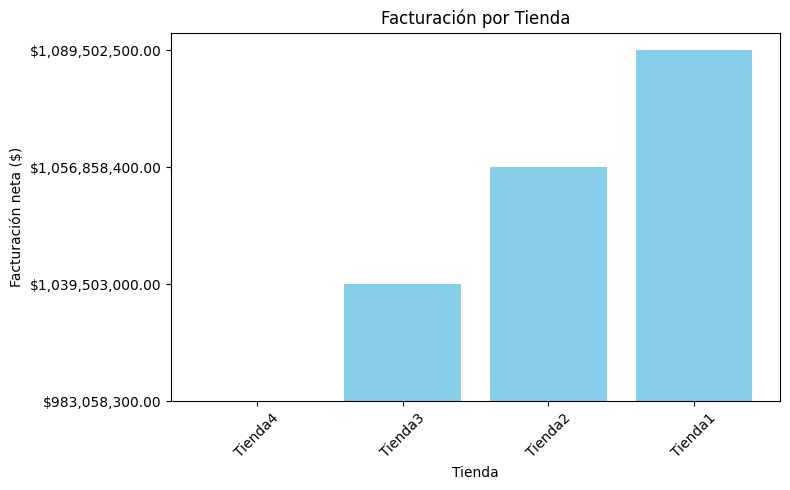

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(vtas_por_tienda["Nbre_Sucursal"], vtas_por_tienda["Facturacion_Neta"], color='skyblue')
plt.title("Facturación por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Facturación neta ($)")
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

# Conclusiones(1)
Si consideramos el Total Facturado x Tienda podemos poner el foco en la Tienda4.

La facturación (que surge de 'facturado-envío') indica que Tienda4 es la que menos vende.  También podría decir que 'no es muy concluyente' esa diferencia de valores.

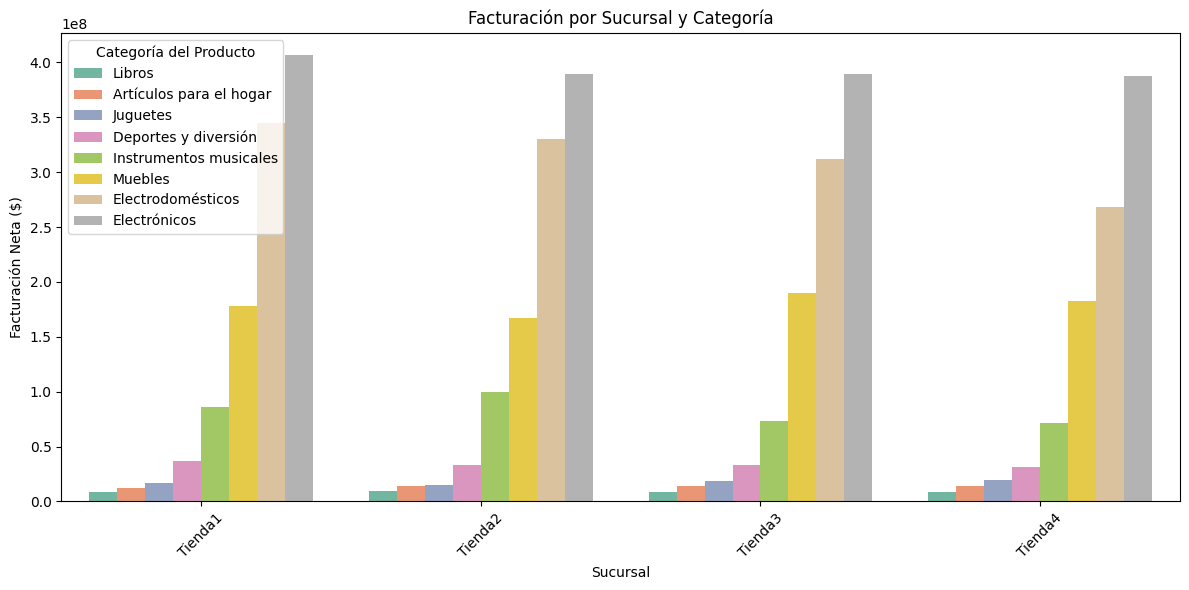

In [44]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    data=vtas_por_categ,
    x="Nbre_Sucursal",
    y="Facturacion_Neta",
    hue="Categoría del Producto",
    palette="Set2"
)

plt.title("Facturación por Sucursal y Categoría")
plt.xlabel("Sucursal")
plt.ylabel("Facturación Neta ($)")
plt.xticks(rotation=45)
plt.legend(title="Categoría del Producto")
plt.tight_layout()
plt.show()


# Conclusiones(2)

Pondría el Ojo en Categorías como "Libros, Articulos para el hogar, Juguetes".
Es decir: conviene vender esos productos si la facturación es tan baja ?.
Habría que ver los "costos" de esos productos para analizar la ganancia bruta real.

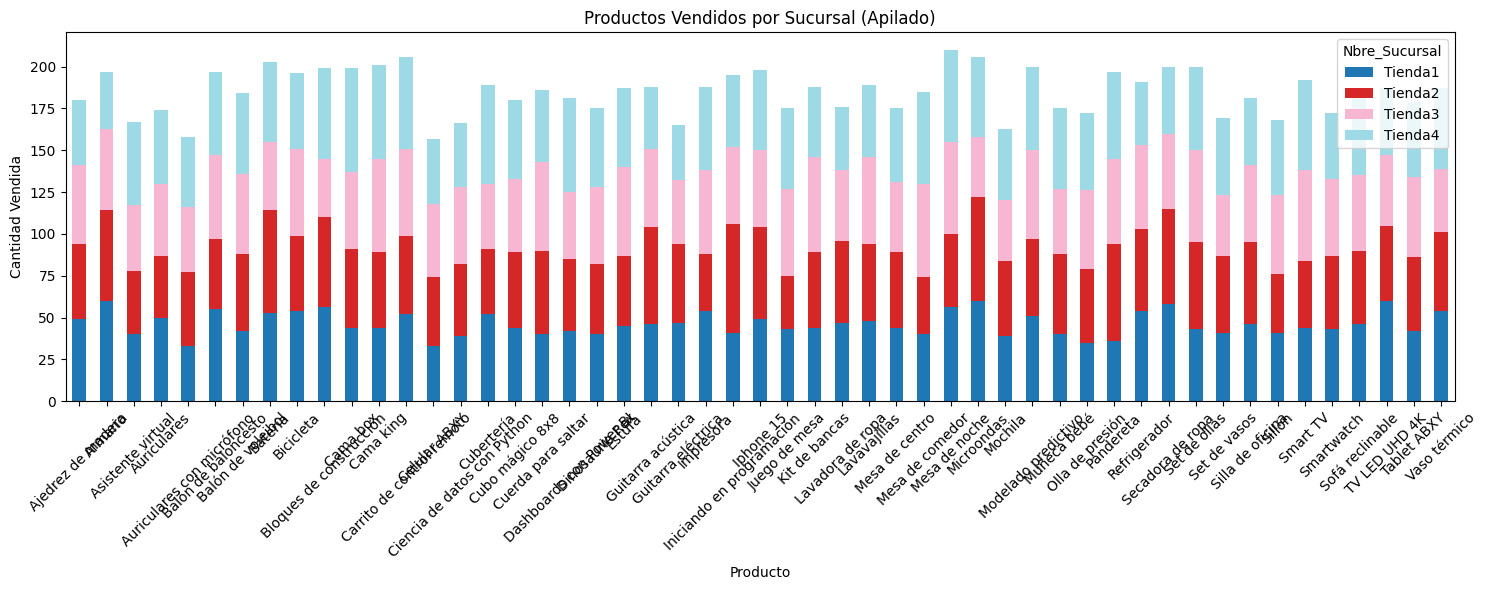

In [45]:
#tabla_calor = vtas_por_producto.pivot(index="Nbre_Sucursal", columns="Producto", values="Cantidad_Vendida").fillna(0)
tabla = vtas_por_producto.pivot(index="Producto", columns="Nbre_Sucursal", values="Cantidad_Vendida").fillna(0)
tabla.plot(kind="bar", stacked=True, figsize=(15,6), colormap="tab20")

plt.title("Productos Vendidos por Sucursal (Apilado)")
plt.xlabel("Producto")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.legend(title="Nbre_Sucursal")
plt.tight_layout()
plt.show()

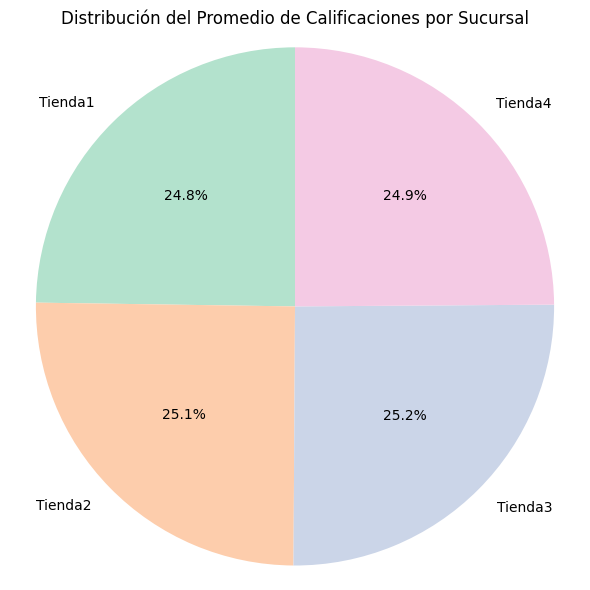

In [46]:
labels = calif_promedio["Nbre_Sucursal"]
valores =calif_promedio["Calificación"]

plt.figure(figsize=(6,6))
plt.pie(valores, labels=labels, autopct="%1.1f%%", startangle=90, colors=plt.cm.Pastel2.colors)

plt.title("Distribución del Promedio de Calificaciones por Sucursal")
plt.axis('equal')
plt.tight_layout()
plt.show()

# Conclusiones(3)
La media de las calificaciones aportadas por los Clientes no da un indicador muy concluyente.  Se puede decir que la Tienda1 es apenas la mas afectada por las calificaciones. Y le sigue la Tienda4.

# *Final*
Con la Información analizada y teniendo que tomar una decisión indico que la Tienda4 es la menos atractiva.